In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

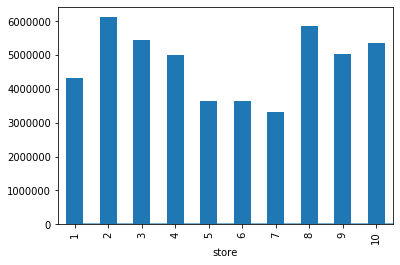

In [4]:
data=pd.read_csv("/Users/Arsal/Downloads/demand-forecasting-kernels-only/train.csv")
plt.plot(data[data.store==1].sales)
data.groupby("store")["sales"].sum().plot(kind='bar')

In [ ]:
ss=df_1_15
ss['date']= pd.to_datetime(ss['date'], errors='coerce')
ss['week_num']=ss['date'].dt.week
ss['year']= ss['date'].dt.year
ss['month']=ss['date'].dt.month
"""grouping based on weeks or months or years, 
this will reduce the freuency of data"""
df_m=ss.set_index('date').resample('M')["sales"].sum()
# plt.plot(df_m)


/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


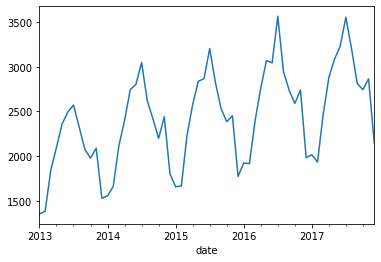

In [5]:
"""Lets first see the forecast of each item in a particular store evolves. 
We saw that item 15 in store 1 had highest sales
The goal here is to see how ARIMA model predicts the future values
"""
df_1_15=data[(data.store==1) & (data.item==15)]
df_1_15['date']= pd.to_datetime(df_1_15['date'], errors='coerce')
df_new=df_1_15.reset_index()
# df_new.set_index('date').sales.plot()
df_new=df_new.set_index('date').resample('M')["sales"].sum()
df_new.plot()

In [98]:
"""Time series decomposition"""
from statsmodels.tsa.seasonal import seasonal_decompose
# df_new_1= df_new.set_index('date')
# result= seasonal_decompose(df_new_1.iloc[:,3:4],freq=20)
df_new_1=df_new
result= seasonal_decompose(df_new_1,freq=20)


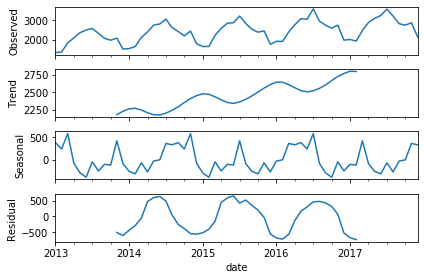

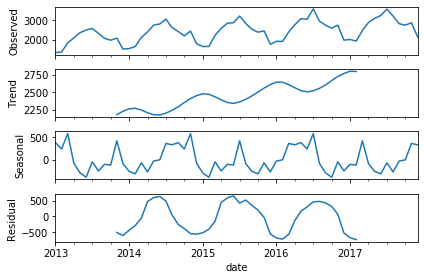

In [99]:
dir(result)

result.plot()

In [8]:
# dff=df_new_1.iloc[:,3:4]
dff= df_new

In [9]:
"""Dickey Fuller Test to check if time series is stationary or not
The best way to model time series data is to remove the seasonal
and trend effects so the model can capture accurate information"""

from statsmodels.tsa.stattools import adfuller
result=adfuller(dff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.765475
p-value: 0.003281


In [34]:
dff_tr= np.log(dff)

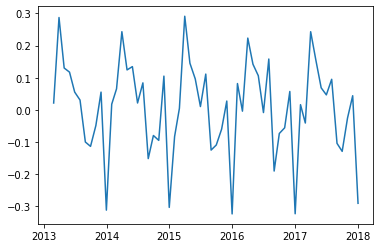

In [106]:
"""since the p-value is less than 0.005 it is safe to say that we can reject the 
null hypotheisis stated by ADF and accept the alternate hypotheisis which is that the TS is stationary"""
"""seasonal differencing"""
differenced= dff_tr.diff(1)
plt.plot(differenced)

/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


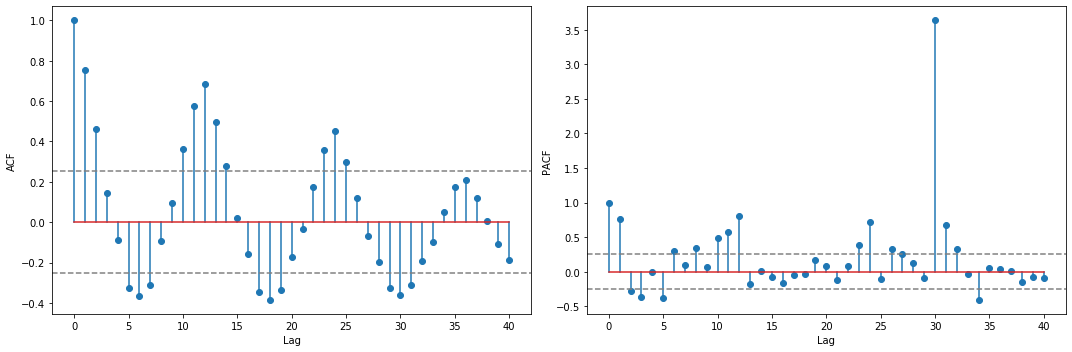

In [101]:
"""https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima"""

"""ACF and PCF plots"""
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lag_acf= acf(dff_tr, nlags=40)
lag_pacf= pacf(dff_tr, nlags=40, method='ols')

"""ACF"""
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
conf_interval= 1.96/np.sqrt(len(dff_tr))
plt.axhline(y=conf_interval, linestyle='--', color= 'gray')
plt.axhline(y=-conf_interval, linestyle='--', color= 'gray')
plt.xlabel("Lag")
plt.ylabel("ACF")


"""PACF"""
plt.subplot(122)
# plt.figure(figsize=(8,5))
plt.stem(lag_pacf)
conf_interval= 1.96/np.sqrt(len(dff_tr))
plt.axhline(y=conf_interval, linestyle='--', color= 'gray')
plt.axhline(y=-conf_interval, linestyle='--', color= 'gray')
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.tight_layout()








/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


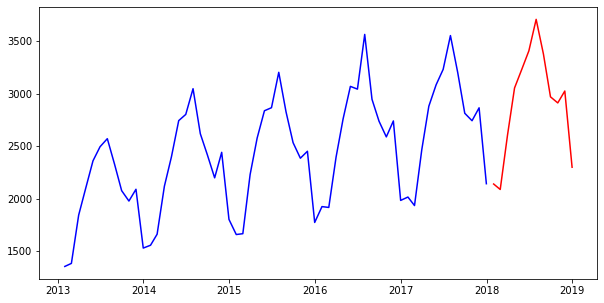

In [105]:
"""Nex we run the arima forecast"""
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(dff_tr, order=(4,1,4), seasonal_order=(1,0,0,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit=model.fit(disp=False)
forecast=model_fit.forecast(12)
forecast= np.exp(forecast)
"""plotting the error metrics"""
plt.figure(figsize=(10,5))
plt.plot(forecast, 'r')
plt.plot(dff,'b')


In [490]:
"""Since our data set has defined seasonality we will go with SARIMA
the odnly difference with plain AIMA is that during the differencing process
instead of sbtracting from previous lagged value we subtract from previous season"""



'Since our data set has defined seasonality we will go with SARIMA\nthe odnly difference with plain AIMA is that during the differencing process\ninstead of sbtracting from previous lagged value we subtract from previous season'

In [173]:
frame=[]
store=[]
for j in range(0,9):
    for i in range(0,49):
        df=(data[(data.store==j) & (data.item==i)])
        frame.append(df)
    store.append(df)


In [180]:
store

[Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns: [date, store, item, sales]
 Index: [], Empty DataFrame
 Columns

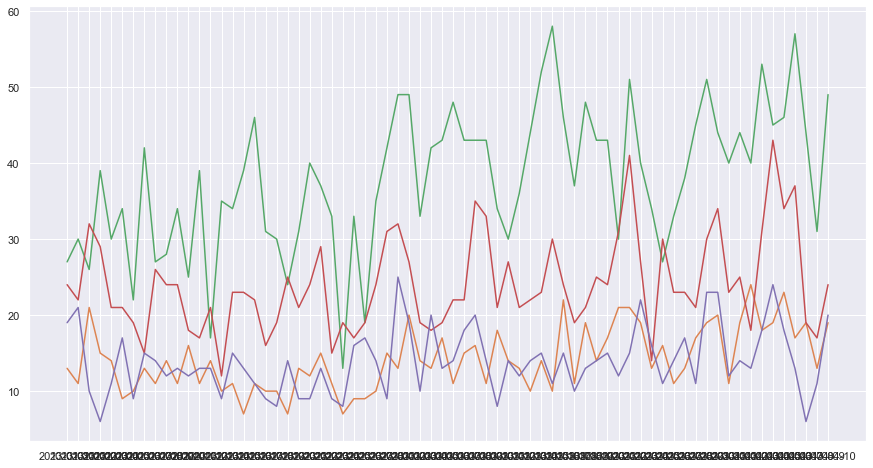

In [165]:
# df=df.set_index("date")
fig = plt.figure()
new_f= [frame[1],frame[2]]
for index,frames in enumerate(frame[0:5]):
#     print(index)
#     frames[index].set_index('date')
#     frames[index]
    a=pd.DataFrame(frames.iloc[30:100])
    plt.plot(a['date'],a['sales'])
plt.show()
#     frame[1].set_index('date')

In [139]:
frame[1].head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [140]:
frame[2].head()

,date,store,item,sales
18260,2013-01-01,1,2,33
18261,2013-01-02,1,2,43
18262,2013-01-03,1,2,23
18263,2013-01-04,1,2,18
18264,2013-01-05,1,2,34


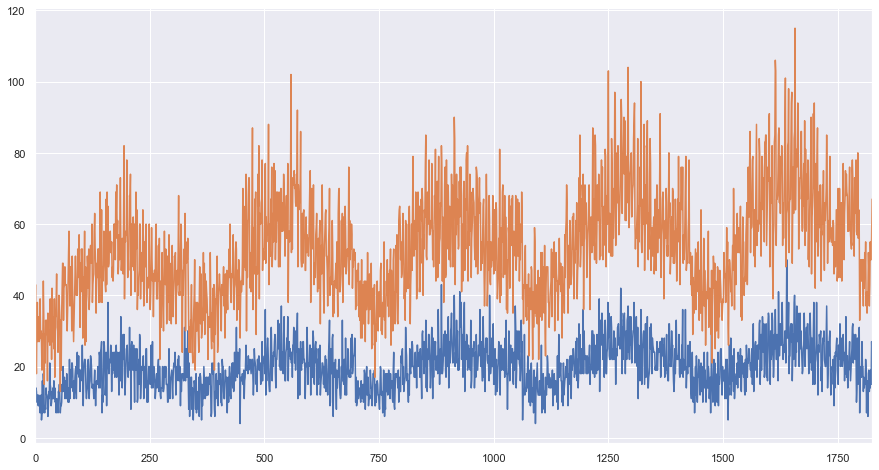

In [143]:
ax=frame[1].sales.plot()
framesss=frame[2].reset_index()
framesss.sales.plot(ax=ax)